In [13]:
import cdtools
import os
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def getCXIPath(scan):
    yr = scan[:2]
    mo = scan[2:4]
    day = scan[4:6]
    scan_no = scan.split('_')[0]
    energy = scan.split('_')[1]
    region = scan.split('_')[2]
    

    return('/global/cfs/cdirs/als/gsharing/data_mover/7012/20{}/{}/{}{}{}/NS_{}_ccdframes_{}_{}.cxi'.format(yr,mo,yr,mo,day,scan_no,energy,region))

In [42]:
fn = getCXIPath('240705099_1_0')

In [44]:
fn

'/global/cfs/cdirs/als/gsharing/data_mover/7012/2024/07/240705/NS_240705099_ccdframes_1_0.cxi'

In [43]:
os.path.exists(fn)

True

Epoch   1 completed in 2.91 s with loss 8.61434e-02
Epoch   2 completed in 2.82 s with loss 2.38995e-02
Epoch   3 completed in 2.82 s with loss 1.59101e-02
Epoch   4 completed in 2.82 s with loss 1.70699e-02
Epoch   5 completed in 2.82 s with loss 1.71127e-02
Epoch   6 completed in 2.82 s with loss 1.67054e-02
Epoch   7 completed in 2.82 s with loss 1.58536e-02
Epoch   8 completed in 2.82 s with loss 1.49848e-02
Epoch   9 completed in 2.81 s with loss 1.41162e-02
Epoch  10 completed in 2.82 s with loss 1.38480e-02
Epoch  11 completed in 2.82 s with loss 1.39388e-02
Epoch  12 completed in 2.81 s with loss 1.37864e-02
Epoch  13 completed in 2.81 s with loss 1.44023e-02
Epoch  14 completed in 2.81 s with loss 1.35695e-02
Epoch  15 completed in 2.78 s with loss 1.22778e-02
Epoch  16 completed in 2.81 s with loss 1.15225e-02
Epoch  17 completed in 2.81 s with loss 1.11575e-02
Epoch  18 completed in 2.81 s with loss 1.16814e-02
Epoch  19 completed in 2.81 s with loss 1.19315e-02
Epoch  20 co

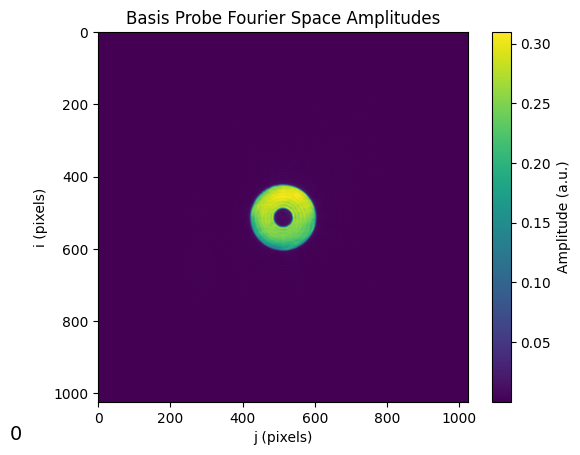

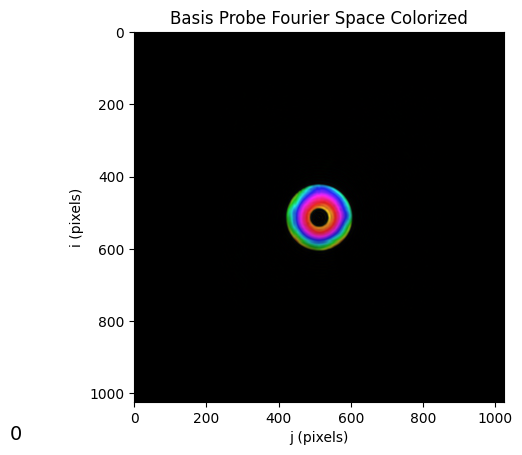

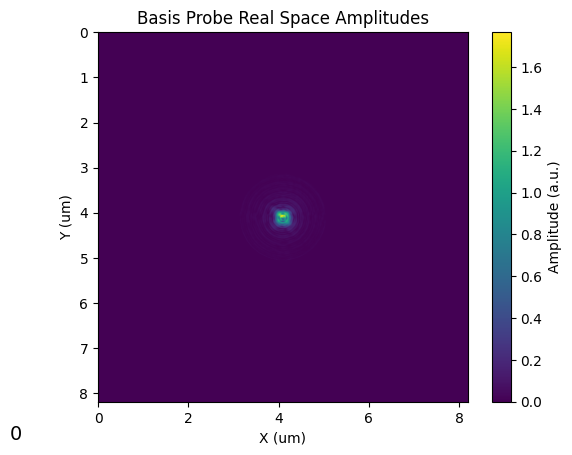

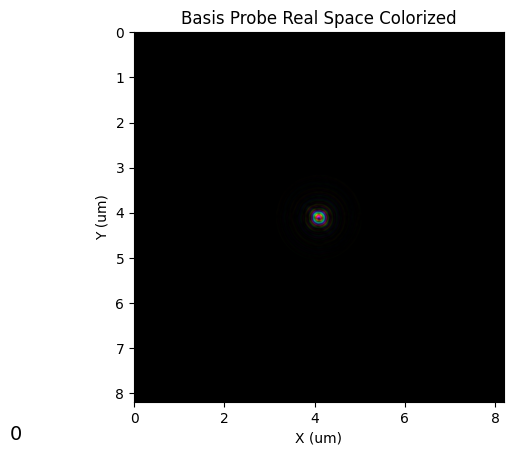

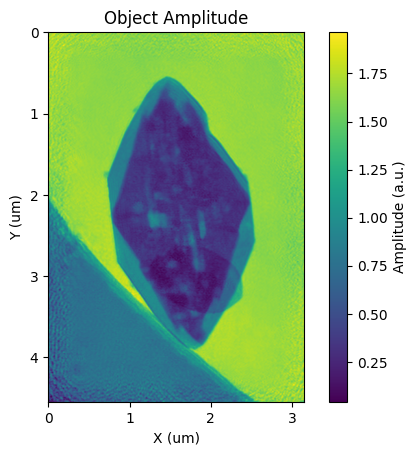

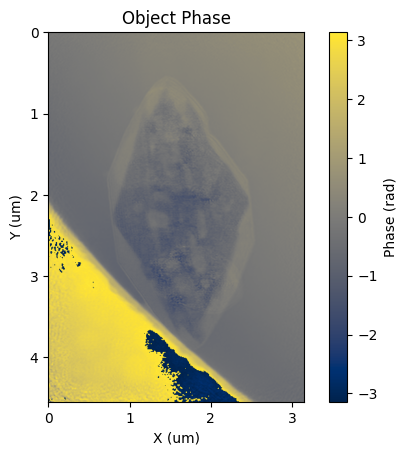

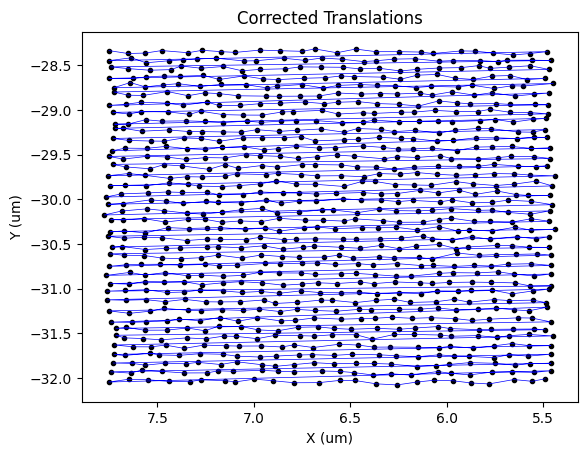

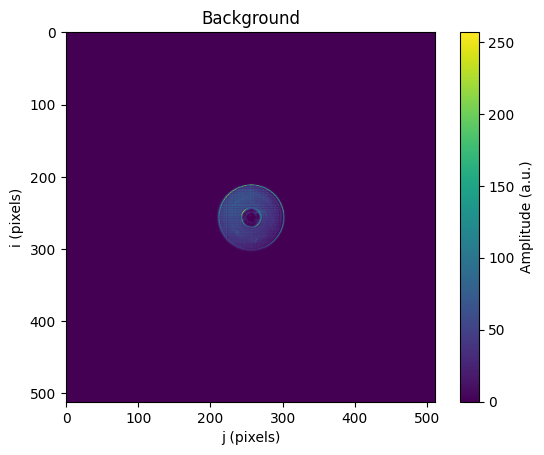

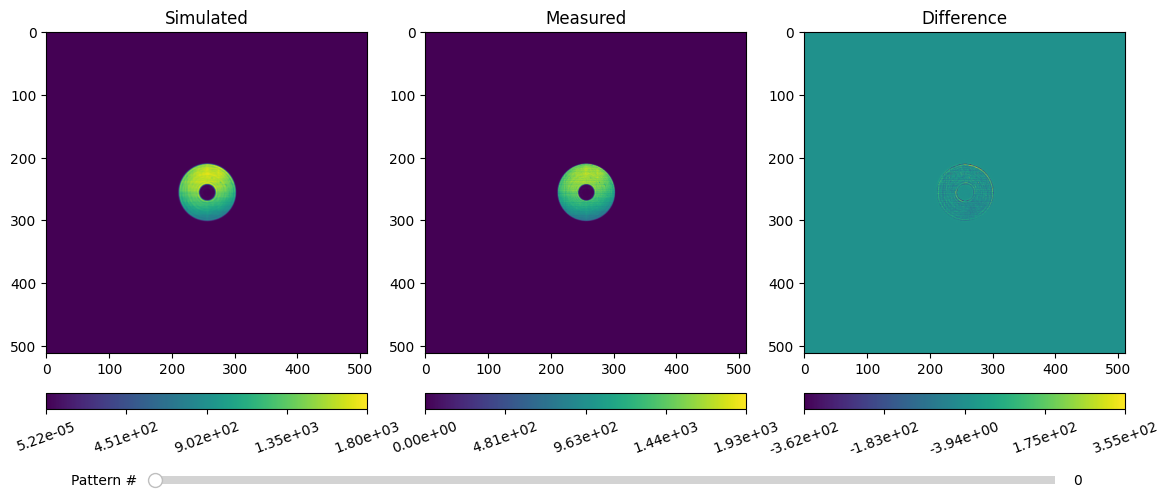

In [8]:
import cdtools
from matplotlib import pyplot as plt

filename = fn
dataset = cdtools.datasets.Ptycho2DDataset.from_cxi(filename)

# FancyPtycho is the workhorse model
model = cdtools.models.FancyPtycho.from_dataset(
    dataset,
    n_modes=3, # Use 3 incoherently mixing probe modes
    oversampling=2, # Simulate the probe on a 2xlarger real-space array
    probe_support_radius=120, # Force the probe to 0 outside a radius of 120 pix
    propagation_distance=15e-6, # Propagate the initial probe guess by 15 um
    units='um', # Set the units for the live plots
    obj_view_crop=-50, # Expands the field of view in the object plot by 50 pix
)

device = 'cuda'
model.to(device=device)
dataset.get_as(device=device)

# The learning rate parameter sets the alpha for Adam.
# The beta parameters are (0.9, 0.999) by default
# The batch size sets the minibatch size
for loss in model.Adam_optimize(50, dataset, lr=0.02, batch_size=10):
    print(model.report())
    # Plotting is expensive, so we only do it every tenth epoch
    # This doesn't work anyways in a jupyter notebook
    #if model.epoch % 10 == 0:
    #    model.inspect(dataset)

# It's common to chain several different reconstruction loops. Here, we
# started with an aggressive refinement to find the probe, and now we
# polish the reconstruction with a lower learning rate and larger minibatch
for loss in model.Adam_optimize(50, dataset,  lr=0.005, batch_size=50):
    print(model.report())
    #if model.epoch % 10 == 0:
    #    model.inspect(dataset)

# This orthogonalizes the recovered probe modes
model.tidy_probes()

model.inspect(dataset)
model.compare(dataset)
plt.show()

In [37]:
od = np.abs(model.obj.cpu().detach().numpy())[700:-700,700:-700]

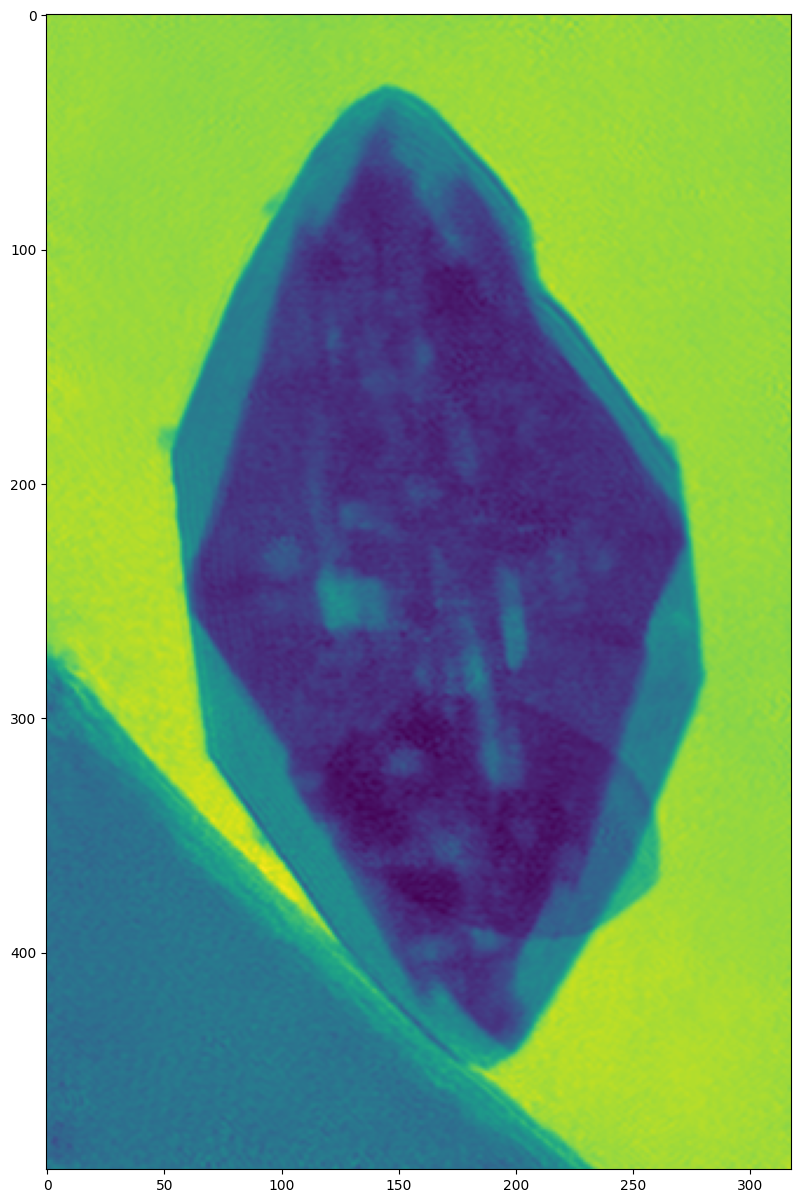

In [40]:
plt.subplots(figsize = (15,15))
plt.imshow(od)

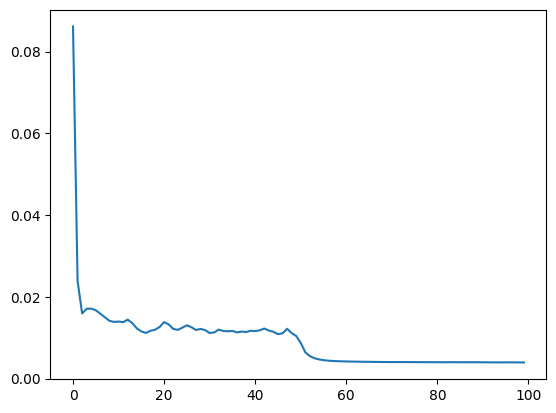

In [24]:
plt.plot(model.loss_history)